# Model performance analysis

## Load data & models

In [2]:
import xarray
import pandas as pd

import functions_model_analysis as f

# import numpy as np
from tqdm import tqdm

import sys
sys.path.append("../AWS_Scripts/")
import functions_model_analysis as ff

In [1]:
# PATH LINA
path = "../Data/combined/dataframe_extended/"

In [3]:
# date_from = "2019-08-14"
# date_to = "2019-08-14"

date_from = "2019-08-01"
date_to = "2019-08-20"

# date_from = "2019-08-02"
# date_to = "2019-08-02"

#path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date_from, date_to=date_to, df_path=path, predict_only=False)
data = f.data_normalization(data)
#data['opt_value2'] = (np.exp(data['opt_value'])-1)

100%|██████████| 20/20 [01:11<00:00,  3.56s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


In [4]:
#LinReg = f.load_object('LinearRegression')
# LinReg_noXY = f.load_object('LinearRegression_NoXY')
# RigdeReg = f.load_object('RidgeRegression')
#LassoReg = f.load_object('LassoRegression')
# ElasticNetReg = f.load_object('ElasticNetRegression')
RandomForest = f.load_object('RandomForest')
GradientBoosting = f.load_object('XGBoost')

### Predict

In [ ]:
#lasso_pred = f.mean_predict(model=LassoReg, data=data)
forest_pred = f.mean_predict(model=RandomForest, data=data)
#xgboost_pred = f.mean_predict(model=GradientBoosting, data=data)
#LinReg_pred = f.mean_predict(LinReg, data = data)

## Analysis II

## Melt vs error plot

In [6]:
# for random forest:


In [7]:
data_melt = xarray.open_dataarray('../Data/indexes_to_plot/all_melt_counts.tif')
data_melt = data_melt.to_dataframe().reset_index()[['x', 'y', 'band_data']]


In [8]:
def add_row_and_col(df):
        # add row and column features:
        df['col'] = df.groupby("x").ngroup() # xshape 2663 
        df['row'] = df.groupby("y").ngroup(ascending=False) # yshape 1462
        return df

data_melt = add_row_and_col(data_melt)

In [13]:
data_melt = data_melt[['band_data',	'col',	'row']]

In [9]:
forest_pred
# check if can join. then aggregate mean 

row  col  mean_prediction  std_prediction  error_prediction  \
0         12  843         0.188353        0.049555          0.129532   
1         13  841         0.188415        0.049508          0.029158   
2         13  842         0.188415        0.049508          0.138058   
3         13  843         0.174972        0.028562          0.164568   
4         13  845         0.189271        0.048920          0.178348   
...      ...  ...              ...             ...               ...   
603160  2525  450         0.132966        0.050043          0.130314   
603161  2525  451         0.132966        0.050043          0.130623   
603162  2525  452         0.132966        0.050043          0.132069   
603221  2526  452         0.161528        0.023003          0.160518   
603423  2530  450         0.374584        0.175535          0.373627   

        residual_prediction  opt_value  opt_value_backtransformed  
0                 -0.129532   0.057157                   0.058822  
1                 -0.029158   0.147780                   0.159257  
2                 -0.138058   0.049130                   0.050357  
3                 -0.164568   0.010350                   0.010404  
4                 -0.178348   0.010864                   0.010923  
...                     ...        ...                        ...  
603160            -0.130314   0.002649                   0.002652  
603161            -0.130623   0.002341                   0.002344  
603162            -0.132069   0.000897                   0.000898  
603221            -0.160518   0.001010                   0.001011  
603423            -0.373627   0.000956                   0.000957  

[15365189 rows x 8 columns]

In [17]:
forest_pred = forest_pred.groupby(['row', 'col']).mean().reset_index()

In [18]:
forest_pred = forest_pred.merge(data_melt, on=['col', 'row'], how='left') # .groupby(['x', 'y', 'col', 'row']).mean()


In [19]:
forest_pred

row  col  mean_prediction  std_prediction  error_prediction  \
0          12  843         0.188353        0.049555          0.129532   
1          13  841         0.188415        0.049508          0.029158   
2          13  842         0.188415        0.049508          0.138058   
3          13  843         0.174972        0.028562          0.164568   
4          13  845         0.189271        0.048920          0.178348   
...       ...  ...              ...             ...               ...   
1426971  2549  670         0.345691        0.038606          0.410349   
1426972  2549  671         0.345027        0.038458          0.416169   
1426973  2549  672         0.345027        0.038458          0.415879   
1426974  2549  673         0.345027        0.038458          0.475182   
1426975  2549  674         0.345027        0.038458          0.498542   

         residual_prediction  opt_value  opt_value_backtransformed  band_data  \
0                  -0.129532   0.057157                   0.058822        5.0   
1                  -0.029158   0.147780                   0.159257        5.0   
2                  -0.138058   0.049130                   0.050357        5.0   
3                  -0.164568   0.010350                   0.010404        5.0   
4                  -0.178348   0.010864                   0.010923        5.0   
...                      ...        ...                        ...        ...   
1426971             0.217431   0.387651                   0.563122        7.0   
1426972             0.220293   0.388436                   0.565319        7.0   
1426973             0.251066   0.403047                   0.596092        7.0   
1426974             0.296553   0.433366                   0.641579        7.0   
1426975             0.316427   0.446871                   0.661454        7.0   

        _merge  
0         both  
1         both  
2         both  
3         both  
4         both  
...        ...  
1426971   both  
1426972   both  
1426973   both  
1426974   both  
1426975   both  

[1426976 rows x 10 columns]

In [25]:
test = forest_pred.groupby('band_data').mean().reset_index()

/tmp/ipykernel_821/2719765444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = forest_pred.groupby('band_data').mean().reset_index()


In [26]:
test

band_data          row         col  mean_prediction  std_prediction  \
0          4.0  1137.704495  833.580841         0.298637        0.031270   
1          5.0  1063.813889  823.330437         0.322877        0.037193   
2          6.0  1143.001707  751.851526         0.311638        0.038201   
3          7.0   851.257807  757.434106         0.368147        0.040941   
4          8.0   967.445684  776.314177         0.361093        0.047668   
..         ...          ...         ...              ...             ...   
352      406.0  2011.987179  424.528045         0.948324        0.132036   
353      407.0  1962.197020  412.274834         1.011440        0.143290   
354      412.0  1987.000000  412.000000         1.019970        0.147614   
355      413.0  1962.000000  437.000000         0.959052        0.130528   
356      417.0  1987.000000  437.000000         0.929432        0.116713   

     error_prediction  residual_prediction  opt_value  \
0            0.169777             0.095971   0.315001   
1            0.196457             0.126569   0.354124   
2            0.214788             0.143034   0.355999   
3            0.203411             0.120141   0.373989   
4            0.210515             0.116118   0.370780   
..                ...                  ...        ...   
352          0.469046            -0.417780   0.408406   
353          0.779487            -0.775736   0.199197   
354          0.669386            -0.668967   0.292458   
355          0.482209            -0.477268   0.384611   
356          0.323518            -0.276285   0.493530   

     opt_value_backtransformed  
0                     0.394608  
1                     0.449446  
2                     0.454671  
3                     0.488288  
4                     0.477211  
..                         ...  
352                   0.530544  
353                   0.235704  
354                   0.351003  
355                   0.481784  
356                   0.653147  

[357 rows x 9 columns]

In [27]:
import matplotlib.pyplot as plt

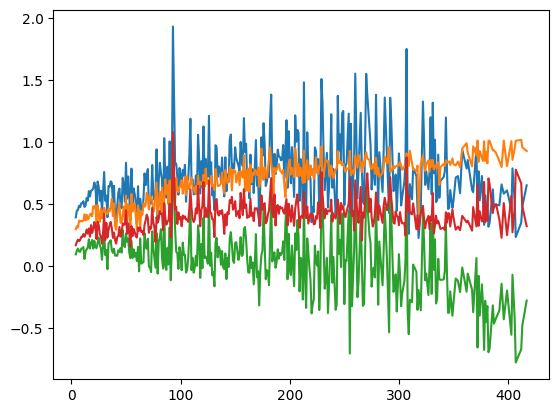

In [28]:
plt.plot(test['band_data'], test['opt_value_backtransformed'])
plt.plot(test['band_data'], test['mean_prediction'])
plt.plot(test['band_data'], test['residual_prediction'])
plt.plot(test['band_data'], test['error_prediction'])

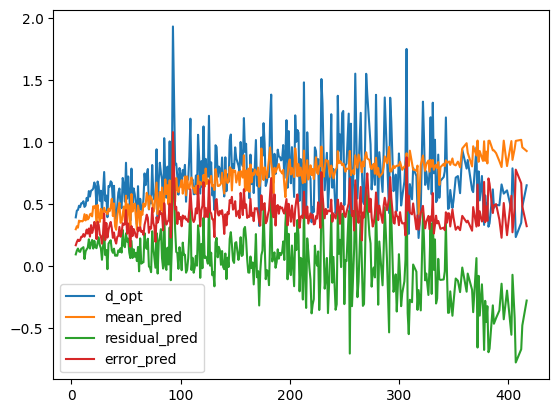

: 

In [31]:
fig, ax = plt.subplots()

ax.plot(test['band_data'], test['opt_value_backtransformed'], label = 'd_opt')
ax.plot(test['band_data'], test['mean_prediction'], label = 'mean_pred')
ax.plot(test['band_data'], test['residual_prediction'], label = 'residual_pred')
ax.plot(test['band_data'], test['error_prediction'], label = 'absolute residual_pred')
plt.legend()

In [ ]:
# does not learn location bc pixels that melt a lot are not much better predicted.

## Tain on 'much melt' pixels?

## Partial dependence plot

In [5]:
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

#from sklearn.inspection._plot.partial_dependence import PartialDependenceDisplay

import numpy as np

### Test/ single

In [6]:
data.columns

Index(['x', 'y', 'mw_value', 'opt_value', 'col', 'row', 'mean_3', 'mean_9',
       'sum_5', 'mw_value_yesterday', 'mw_value_7_day_average',
       'hours_of_daylight', 'elevation_data', 'slope_data', 'aspect_data',
       'distance_to_margin'],
      dtype='object')

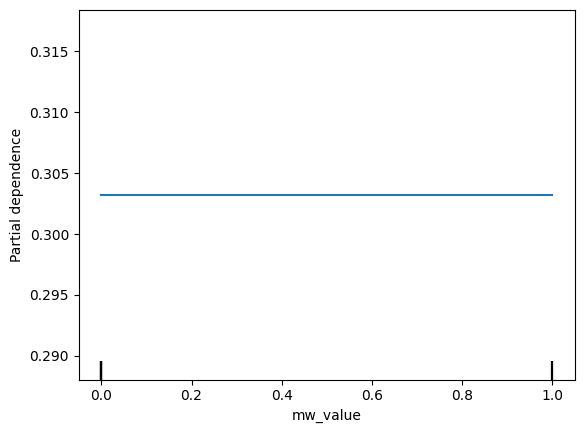

In [21]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [2])

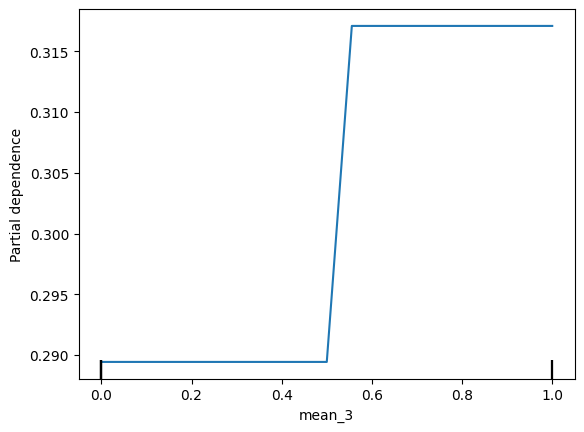

In [7]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [6])

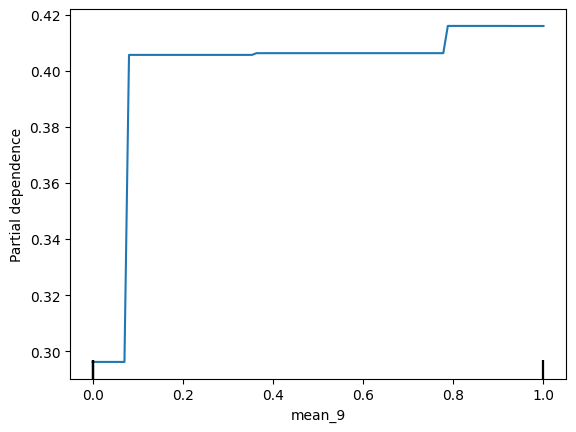

In [8]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [7])

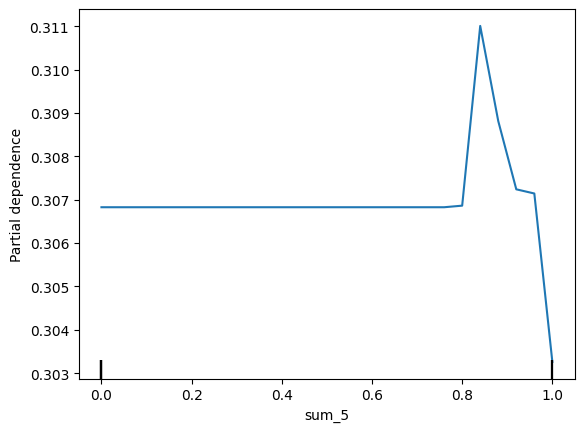

In [9]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [8])

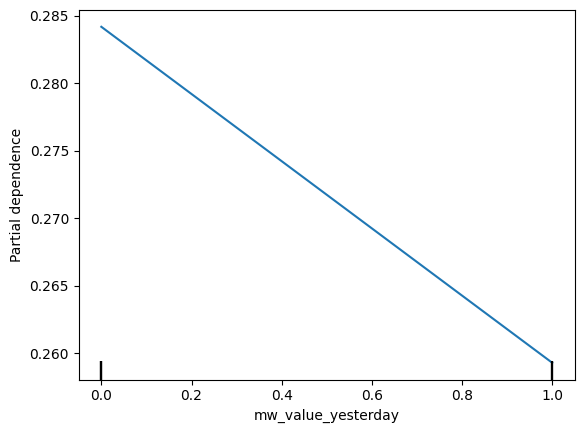

In [10]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [9])

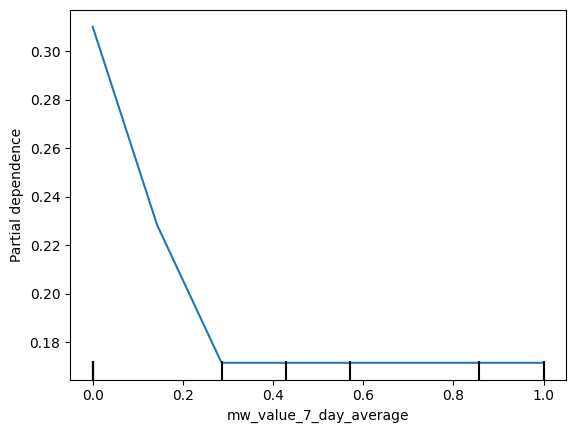

In [11]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [10])

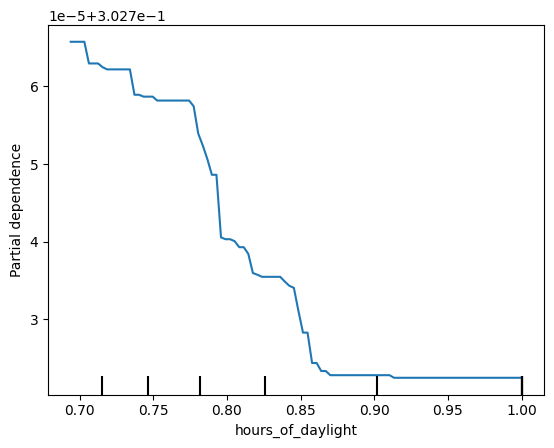

In [12]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [11])

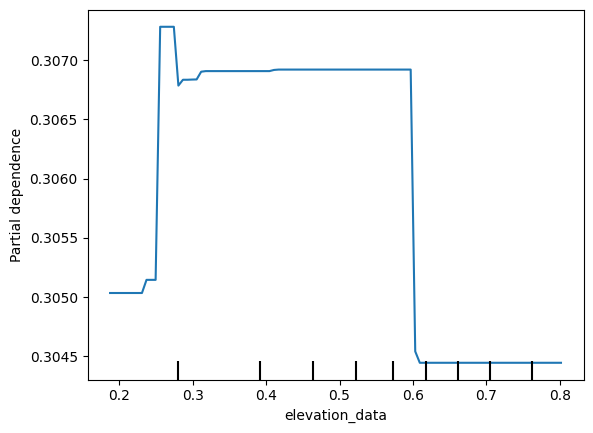

In [13]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [12])

/mnt/c/Users/linas/OneDrive/Documents/ITU/Semester3/RP_Greenland/RP_Greenland/.venv/lib/python3.9/site-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


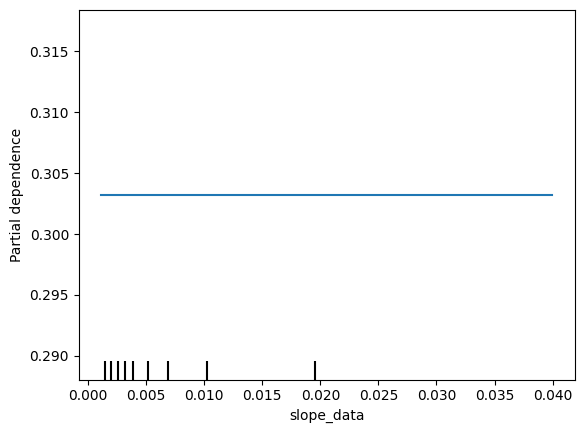

In [14]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [13])

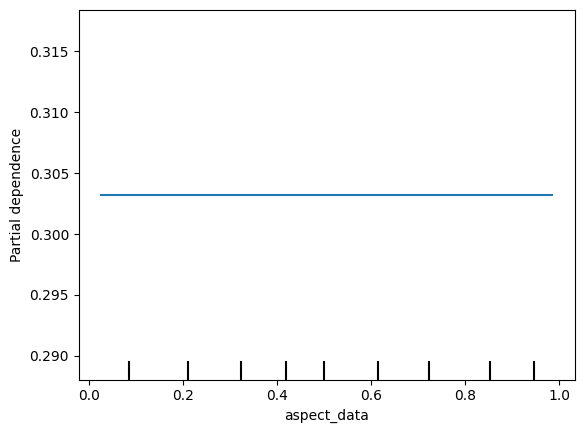

In [15]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [14])

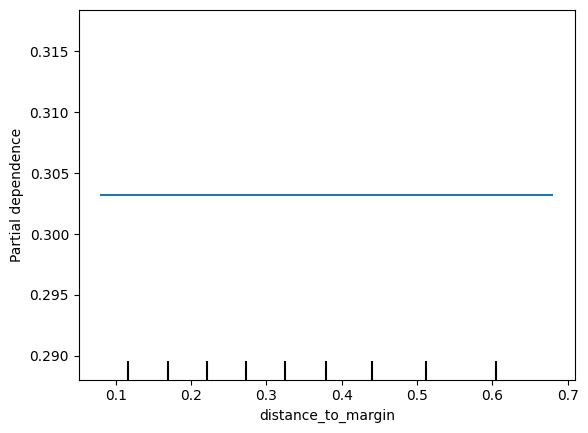

In [16]:
PartialDependenceDisplay.from_estimator(RandomForest.cv_model_list[0], data, [15])

### All in one

In [41]:
def plot_pdp(feature_name, model, data):
    # Initialize an empty list to store the partial dependence results
    partial_dependence_results = []

    # Iterate over the trained models
    for model in model.cv_model_list:
        # Compute partial dependence for the desired feature(s)
        partial_dependence_results.append(partial_dependence(model, data, [data.columns.get_loc(feature_name)]))

    # Extract the partial dependence values from the dictionaries
    partial_dependence_values = [result['average'] for result in partial_dependence_results]

    # Compute the average partial dependence across models
    average_partial_dependence = np.mean(partial_dependence_values, axis=0)

    # Extract the average partial dependence values
    average_partial_dependence = average_partial_dependence[0]  # Assuming only one feature

    # Plot the average PDP
    plt.plot(partial_dependence_results[0]['values'][0], average_partial_dependence)

    plt.xlabel('Feature values')
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence Plot for {feature_name}')



In [32]:
data.columns

Index(['x', 'y', 'mw_value', 'opt_value', 'col', 'row', 'mean_3', 'mean_9',
       'sum_5', 'mw_value_yesterday', 'mw_value_7_day_average',
       'hours_of_daylight', 'elevation_data', 'slope_data', 'aspect_data',
       'distance_to_margin'],
      dtype='object')

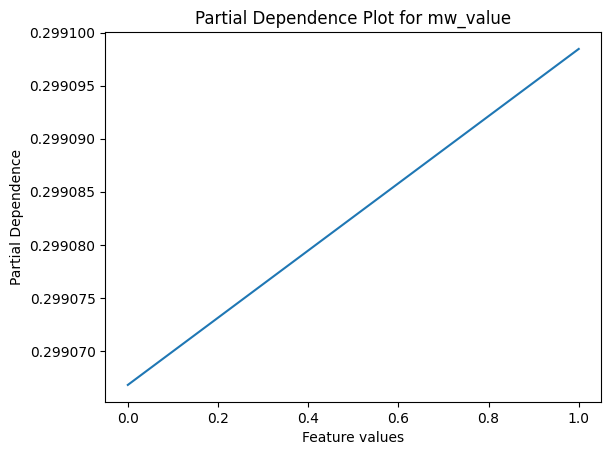

In [42]:
plot_pdp('mw_value', RandomForest, data)
#plt.ylim((0.25, 0.35))

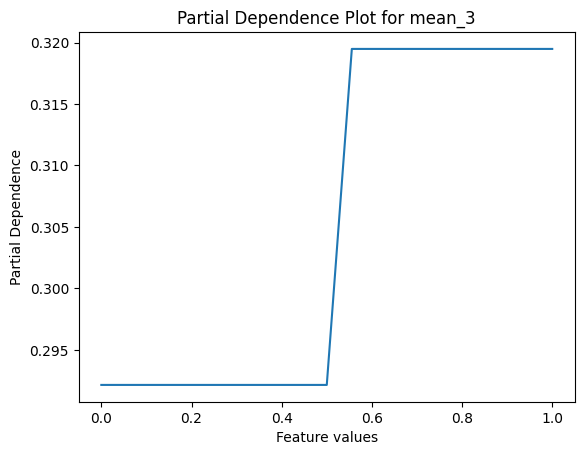

In [33]:
plot_pdp('mean_3', RandomForest, data)

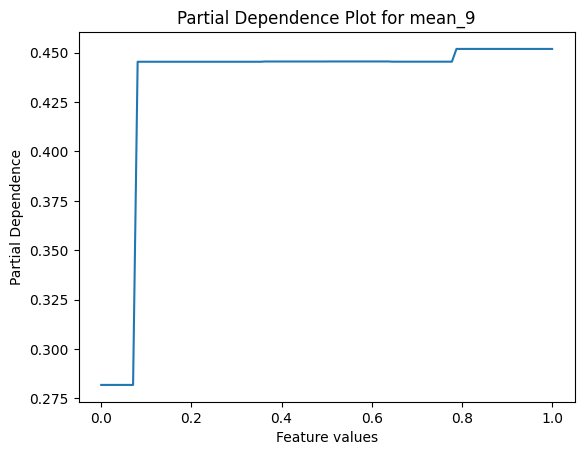

In [43]:
plot_pdp('mean_9', RandomForest, data)

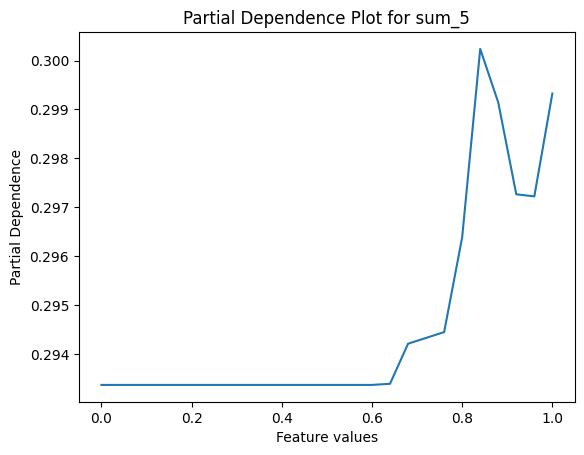

In [44]:
plot_pdp('sum_5', RandomForest, data)

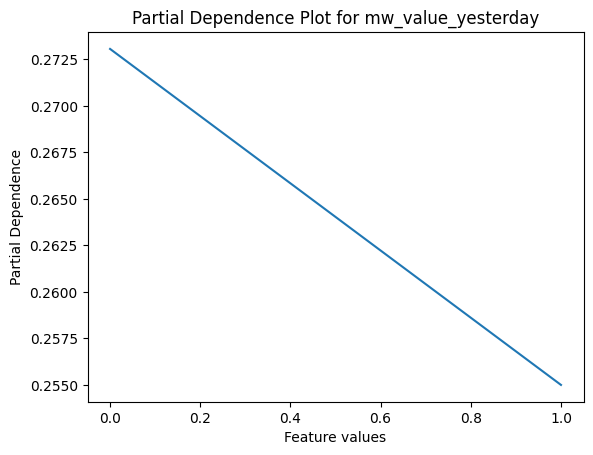

In [45]:
plot_pdp('mw_value_yesterday', RandomForest, data)

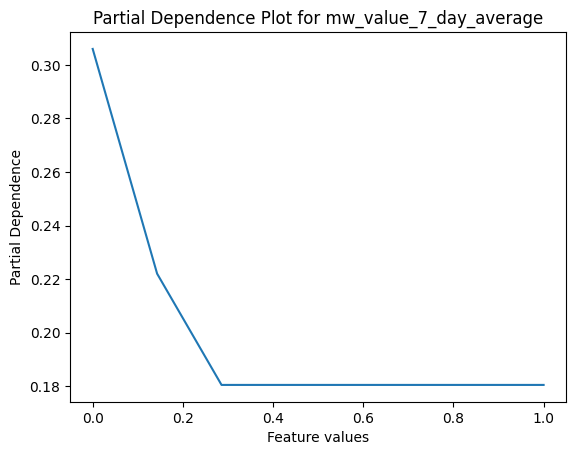

In [46]:
plot_pdp('mw_value_7_day_average', RandomForest, data)


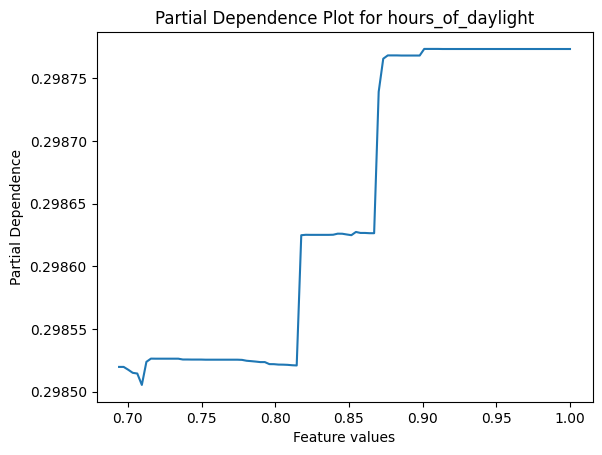

In [47]:
plot_pdp('hours_of_daylight', RandomForest, data)


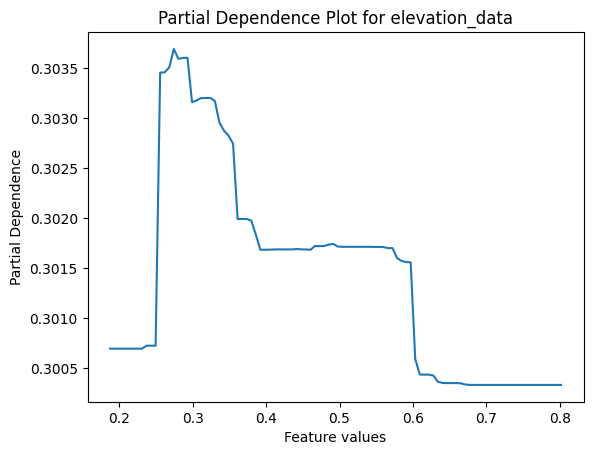

In [48]:
plot_pdp('elevation_data', RandomForest, data)


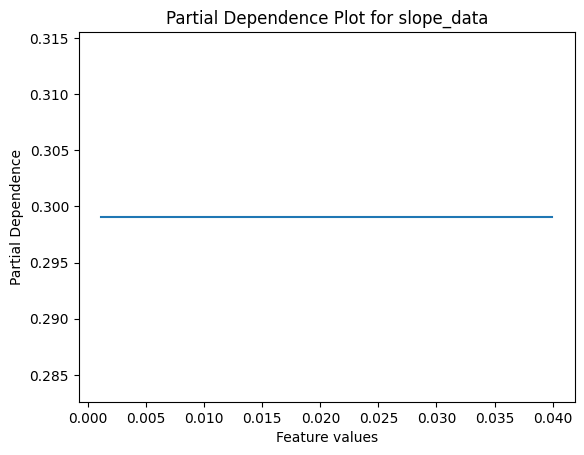

In [49]:
plot_pdp('slope_data', RandomForest, data)

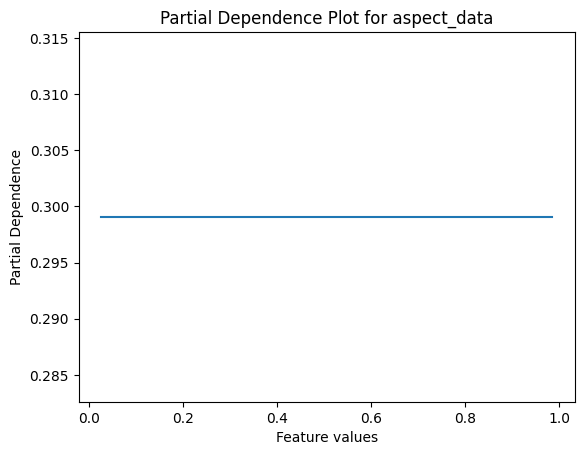

In [50]:
plot_pdp('aspect_data', RandomForest, data)

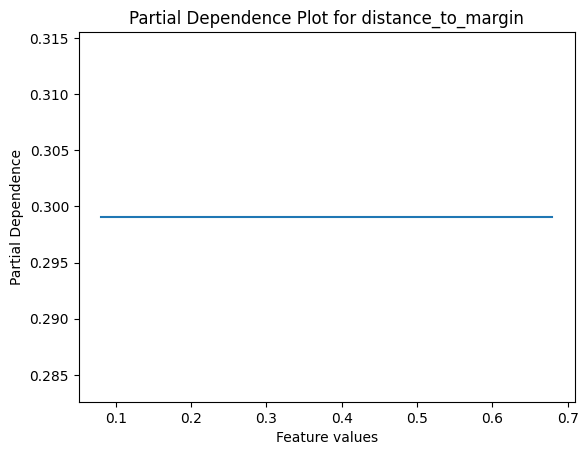

In [51]:
plot_pdp('distance_to_margin', RandomForest, data)

In [52]:
import functions_model_analysis as f

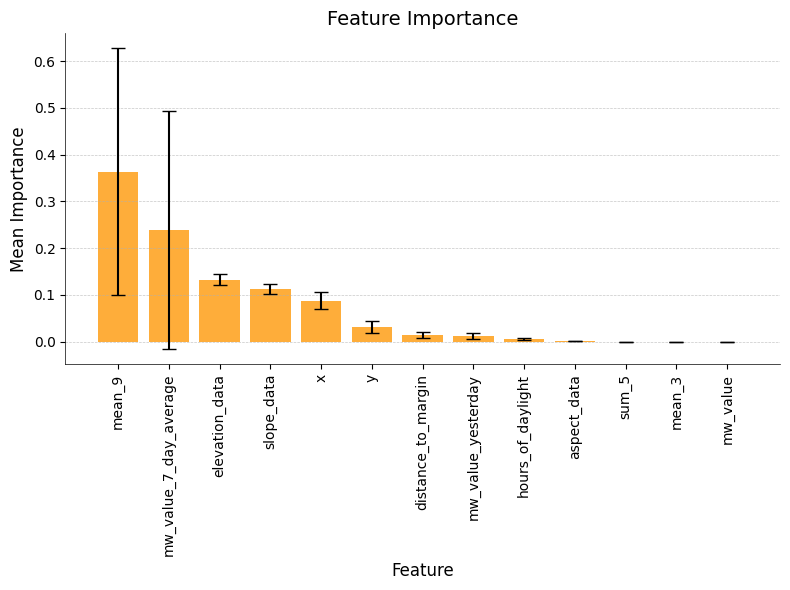

In [53]:
f.plot_feature_importance(RandomForest)

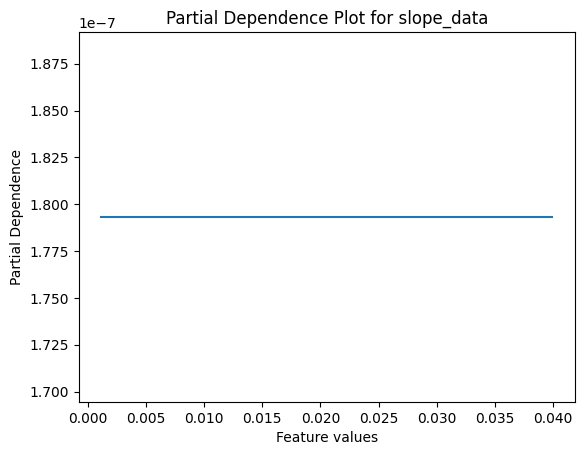

In [55]:
plot_pdp('slope_data', GradientBoosting, data)

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pdp_2d(feature_name1, feature_name2):
    # Initialize an empty list to store the partial dependence results
    partial_dependence_results = []

    # Iterate over the trained models
    for model in RandomForest.cv_model_list:
        # Compute partial dependence for the desired features
        feature_indices = [data.columns.get_loc(feature_name1), data.columns.get_loc(feature_name2)]
        partial_dependence_results.append(partial_dependence(model, data, feature_indices))

    # Extract the partial dependence values from the dictionaries
    partial_dependence_values = [result['average'] for result in partial_dependence_results]

    # Compute the average partial dependence across models
    average_partial_dependence = np.mean(partial_dependence_values, axis=0)

    # Extract the average partial dependence values
    average_partial_dependence = average_partial_dependence[0]  # Assuming only one target class

    # Plot the average PDP for the two features
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Get the values for each feature
    feature_values1 = partial_dependence_results[0]['values'][0]
    feature_values2 = partial_dependence_results[0]['values'][1]

    # Create a meshgrid for the feature values
    feature_meshgrid1, feature_meshgrid2 = np.meshgrid(feature_values1, feature_values2)

    # Reshape the average partial dependence values to match the meshgrid shape
    pdp_values = average_partial_dependence.reshape(feature_meshgrid1.shape)

    # Plot the 3D surface
    ax.plot_surface(feature_meshgrid1, feature_meshgrid2, pdp_values, cmap='viridis')

    # Set the axis labels
    ax.set_xlabel(feature_name1)
    ax.set_ylabel(feature_name2)
    ax.set_zlabel('Partial Dependence')

    # Set the plot title
    plt.title(f'Partial Dependence Plot for {feature_name1} and {feature_name2}')

    # Show the plot
    plt.show()


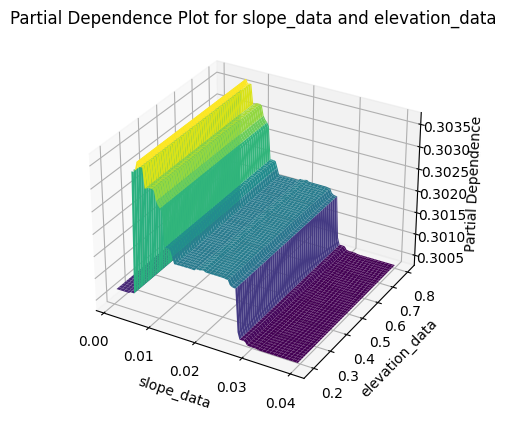

In [57]:
plot_pdp_2d('slope_data', 'elevation_data')


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_binned_data(data, x_column, y_column, num_bins):
    # Create bins for x_column based on the number of samples
    bins = pd.qcut(data[x_column], q=num_bins, duplicates = 'drop')
    
    # Calculate the average y_column for each bin
    binned_data = data.groupby(bins)[y_column].mean()

    # Compute the midpoints of the bins
    bin_midpoints = [(bin.left + bin.right) / 2 for bin in binned_data.index]

    # Plot the data
    plt.plot(bin_midpoints, binned_data.values, marker='o')

    # Set labels and title
    plt.xlabel(x_column)
    plt.ylabel(f"Average {y_column}")
    plt.title(f"Average {y_column} vs. {x_column}")

    # Show the plot
    plt.show()


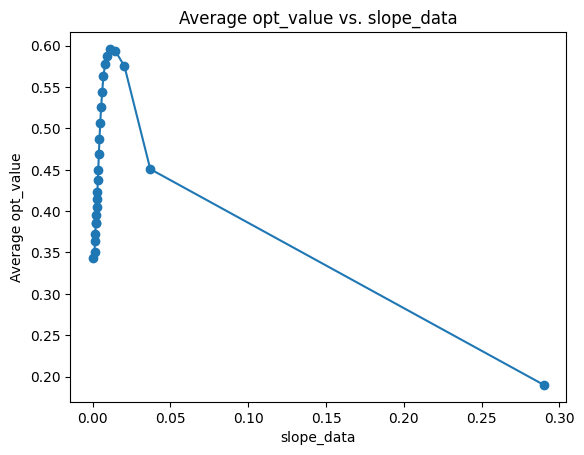

In [113]:
# Assuming your data is stored in a pandas DataFrame called 'data'
plot_binned_data(data, 'slope_data', 'opt_value', 25)


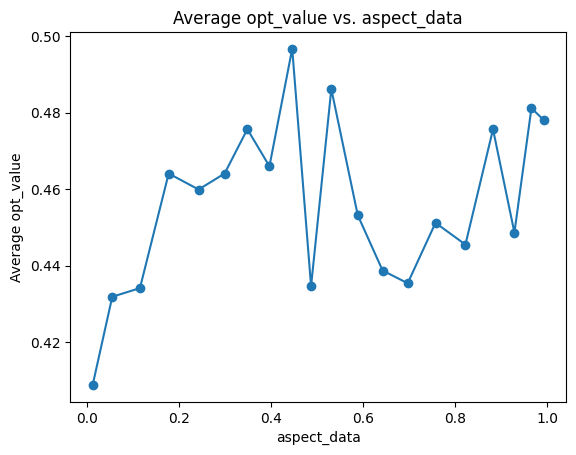

In [126]:
plot_binned_data(data, 'aspect_data', 'opt_value', 20)


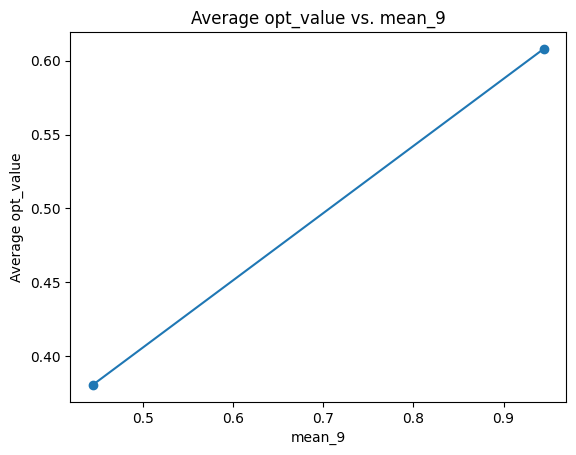

In [116]:
plot_binned_data(data, 'mean_9', 'opt_value', 6)


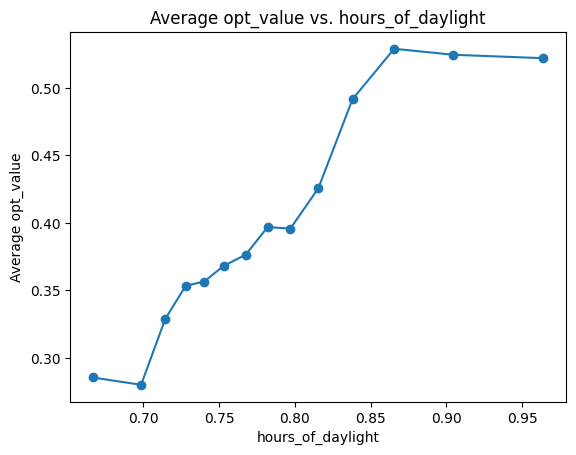

In [118]:
plot_binned_data(data, 'hours_of_daylight', 'opt_value', 25)


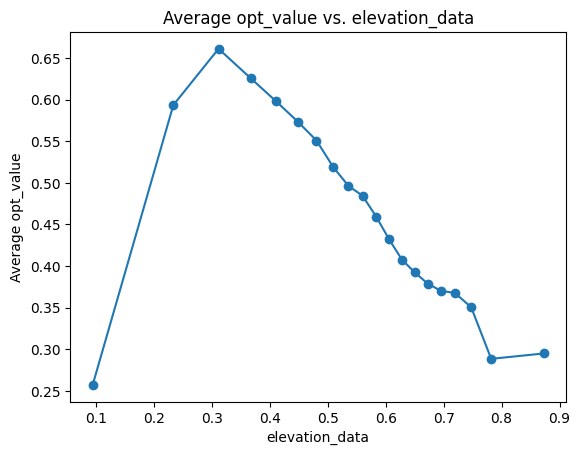

In [121]:
plot_binned_data(data, 'elevation_data', 'opt_value', 20)


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_binned_data(data, x_column, y_column, z_column, num_bins):
    # Create bins for x_column and y_column based on the number of samples
    x_bins = pd.qcut(data[x_column], q=num_bins, duplicates='drop')
    y_bins = pd.qcut(data[y_column], q=num_bins, duplicates='drop')

    # Convert x_column and y_column to numeric data type
    data[x_column] = pd.to_numeric(data[x_column], errors='coerce')
    data[y_column] = pd.to_numeric(data[y_column], errors='coerce')

    # Calculate the average z_column for each combination of x_bin and y_bin
    binned_data = data.groupby([x_bins, y_bins])[z_column].mean().reset_index()

    # Convert interval values to midpoints for x_column
    binned_data[x_column] = binned_data[x_column].apply(lambda x: x.mid)

    # Convert interval values to midpoints for y_column
    binned_data[y_column] = binned_data[y_column].apply(lambda x: x.mid)

    # Generate evenly spaced values for the bin midpoints
    x_midpoints = np.linspace(binned_data[x_column].min(), binned_data[x_column].max(), num_bins)
    y_midpoints = np.linspace(binned_data[y_column].min(), binned_data[y_column].max(), num_bins)

    # Create a meshgrid of bin midpoints
    X, Y = np.meshgrid(x_midpoints, y_midpoints)

    # Reshape the binned_data values to match the shape of X and Y
    Z = binned_data[z_column].values.reshape(X.shape)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data
    ax.plot_surface(X, Y, Z)

    # Set labels and title
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(f"Average {z_column}")
    ax.set_title(f"Average {z_column} vs. {x_column} and {y_column}")

    # Show the plot
    plt.show()


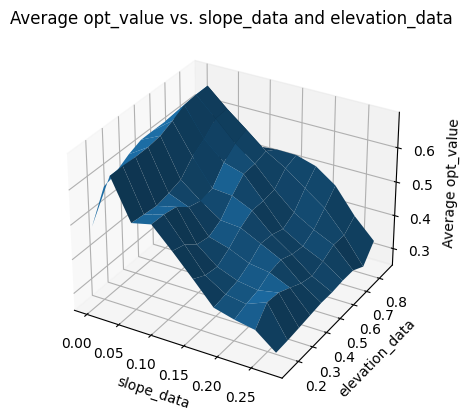

In [110]:
plot_3d_binned_data(data, 'slope_data', 'elevation_data', 'opt_value', 10)


In [6]:
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = 'notebook'

In [7]:
def plot_3d_binned_data_plotly(data, x_column, y_column, z_column, num_bins):
    # Create bins for x_column and y_column based on the number of samples
    x_bins = pd.qcut(data[x_column], q=num_bins, duplicates='drop')
    y_bins = pd.qcut(data[y_column], q=num_bins, duplicates='drop')

    # Calculate the average z_column for each combination of x_bin and y_bin
    binned_data = data.groupby([x_bins, y_bins])[z_column].mean().reset_index()

    # Convert interval values to midpoints for x_column
    binned_data[x_column] = binned_data[x_column].apply(lambda x: x.mid)

    # Convert interval values to midpoints for y_column
    binned_data[y_column] = binned_data[y_column].apply(lambda x: x.mid)

    # Create a 3D surface plot
    fig = go.Figure(data=[go.Surface(x=binned_data[x_column], y=binned_data[y_column], z=binned_data[z_column])])

    # Set axis labels and title
    fig.update_layout(
        scene=dict(
            xaxis_title=x_column,
            yaxis_title=y_column,
            zaxis_title=f"Average {z_column}"
        ),
        title=f"Average {z_column} vs. {x_column} and {y_column}"
    )

    # Show the plot
    fig.show()


In [8]:
plot_3d_binned_data_plotly(data, 'slope_data', 'elevation_data', 'opt_value', 12)


## Analysis I

### Model performance table

In [6]:
# model_list_all = [LinReg , LinReg_noXY, RigdeReg, LassoReg, ElasticNetReg, RandomForest, GradientBoosting]
# table = f.model_comparison_table(model_list_all).reset_index()
# table[table['Set']=='Test']

Model   Set      RMSE  RMSE_std        R2    R2_std
1        LinearRegression  Test  0.184476  0.031713  0.048278  0.194516
3   LinearRegression_NoXY  Test  0.183465  0.024423  0.060173  0.129444
5         RidgeRegression  Test  0.184469  0.031698  0.048343  0.194484
7         LassoRegression  Test  0.179125  0.016700  0.100123  0.084724
9    ElasticNetRegression  Test  0.185035  0.028033  0.035457  0.208491
11           RandomForest  Test  0.197773  0.030502 -0.101216  0.246953
13                XGBoost  Test  0.188516  0.032070 -0.012913  0.300837

### Mean error plot (all models)


In [7]:
df_opt = (np.exp(data['opt_value'])-1)
bin_range = (df_opt.min(), df_opt.max())
bin_width = 0.1
bin_edges = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)
bin_labels = np.arange(0.05, bin_edges[-1]+0.05, 0.1)

# ORIGINAL

mean_error_list = []

for model in model_list:
    print(model.name)
    print('predict start')
    df = f.mean_predict(model, data)[['error_prediction']]
    print('predict done')
    df['value_bin'] = pd.cut(df_opt, bins=bin_edges, labels=False) 
    print('cut done')
    mean_error = df.groupby('value_bin')['error_prediction'].mean()
    print('group done')
    del df
    mean_error_list.append(mean_error)

LassoRegression
predict start
predict done
cut done
group done
XGBoost
predict start
predict done
cut done
group done
RandomForest
predict start
predict done
cut done
group done


In [ ]:
# doesnt work when gaps in buckets

# df = f.mean_predict(LinReg, data)[['error_prediction']]
# df['df_opt'] = df_opt
# df['value_bin'] = pd.cut(df_opt, bins=bin_edges, labels=False, include_lowest=True)
# bin_numbers = df['value_bin'].unique()
# mean_error = df.groupby('value_bin')['error_prediction'].mean()
# #del df
# #mean_error_list.append(mean_error)


# # # get bin numbers and see which dont overlap
# # # when plotting, interpolate
# # should_bin_numbers = list(range(0, len(bin_labels)))
# # missing_bins = list(set(should_bin_numbers) - set(bin_numbers))

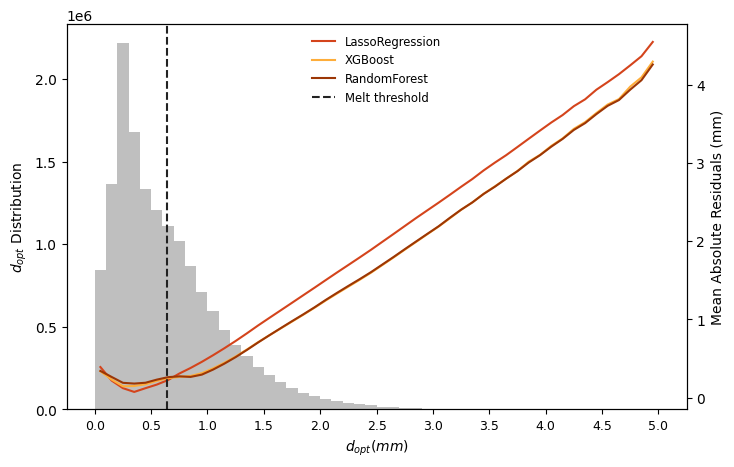

In [8]:
colors = ['#d4441c',  '#fead3a', '#9c3605']

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_opt, bins=bin_edges, color='gray', alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.tick_params(axis = 'x', which = 'major', labelsize = 9)

ax2 = ax.twinx()
for i in range(len(mean_error_list)):
    ax2.plot(bin_labels, mean_error_list[i].values, label=model_list[i].name, color=colors[i])

ax2.axvline(x=0.64, color='#222222', linestyle='--', label = 'Melt threshold')
ax.set_xlabel('$d_{opt} (mm)$')
ax.set_ylabel('$d_{opt}$ Distribution')
ax2.set_ylabel('Mean Absolute Residuals (mm)')
#ax.set_title('$d_{opt}$ vs. Mean Absolute Residuals')
legend = ax2.legend(loc='upper center', fontsize='small')
legend.get_frame().set_alpha(0.0)
plt.show()

### Residual analysis

In [5]:
def residual_analysis(pred, data):
    sampled_df = pred.sample(frac=0.05, random_state=1)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(3, 2, 2)
    ax3 = plt.subplot(3, 2, 4)
    ax4 = plt.subplot(3, 2, 6)

    axes = [ax1, ax2, ax3, ax4]

    #####################
    data1 = pred['residual_prediction']
    ax1.hist(data1, bins=100, color='grey')
    ax1.grid(color='lightgray')
    ax1.set_xlabel('Residual (mm)', fontsize = 9)
    ax1.set_ylabel('Frequency', fontsize = 9)
    ax1.set_title('a) Residual Distribution Histogram')

    #####################
    stats.probplot(data1, plot=ax2, fit=True) # Normality Q-Q Plot

    ax2.get_lines()[0].set_color('firebrick')
    ax2.get_lines()[1].set_color('#222222')
    ax2.set_xlabel('Theoretical Quantiles', fontsize = 9)
    ax2.set_ylabel('Data Sample Quantiles', fontsize = 9)
    ax2.set_title('b) Residual Distribution Normality Q-Q Plot') 
    #ax2.text(1.34, 0.98, "Residual Distribution Normality Q-Q Plot", fontsize=12, ha='center', va='top', transform=ax1.transAxes)

    #####################

    ax3.scatter(sampled_df['opt_value_backtransformed'], sampled_df['residual_prediction'], alpha=0.01, color='firebrick')
    ax3.axhline(y=0, color='lightgray', linewidth=0.5)

    ax3.set_xlabel('$d_{opt}$ (mm)', fontsize = 9)
    ax3.set_ylabel('Residual (mm)', fontsize = 9)
    #ax3.set_title('Sampled Data Scatter Plot', loc="left")
    ax3.text(1.25, 0.64, "c)", fontsize=12, ha='center', va='top', transform=ax1.transAxes)

    #####################

    ax4.scatter(sampled_df['mean_prediction'], sampled_df['residual_prediction'], alpha=0.01, color='firebrick')
    ax4.axhline(y=0, color='lightgray', linewidth=0.5)

    ax4.set_xlabel('$d_{opt}$ Predicted (mm)', fontsize = 9)
    ax4.set_ylabel('Residual (mm)',  fontsize = 9)
    ax4.text(1.25, 0.28, "d)", fontsize=12, ha='center', va='top', transform=ax1.transAxes)

    #####################


    #plt.suptitle("Residual analysis", fontsize=16)
    plt.show()



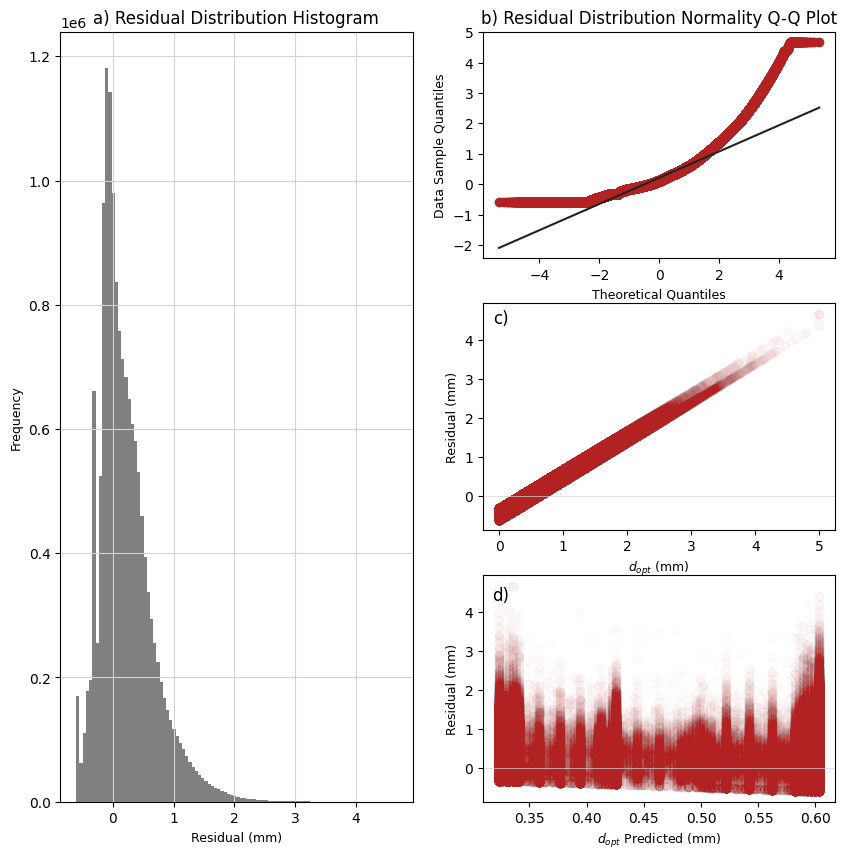

In [6]:
residual_analysis(lasso_pred, data) # 20 d

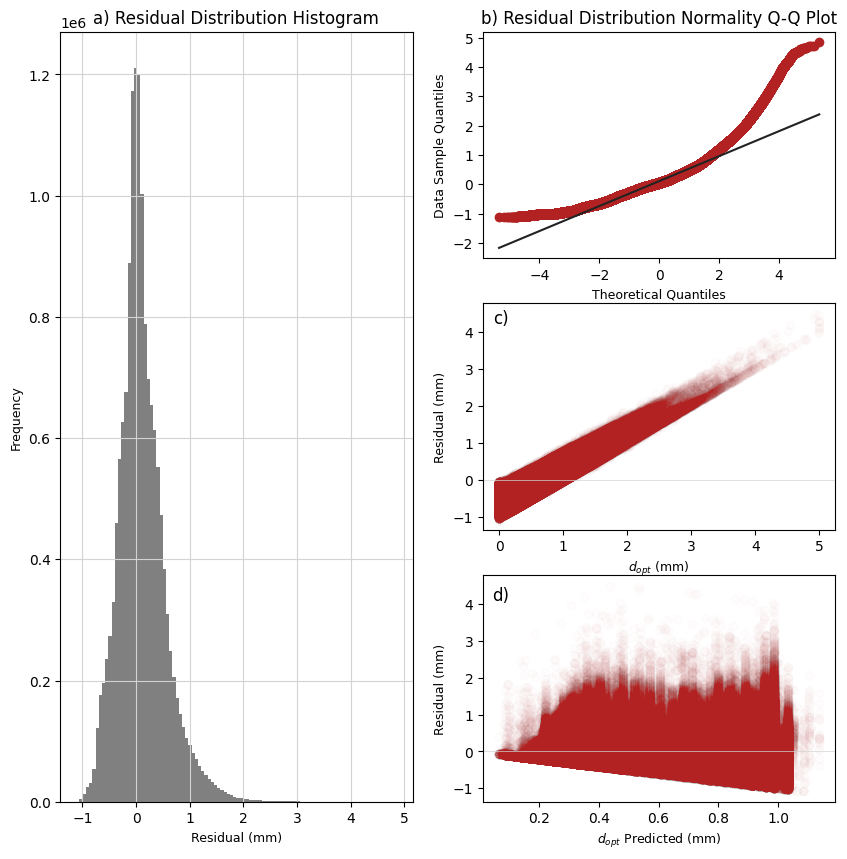

In [6]:
residual_analysis(forest_pred, data) # 20 d

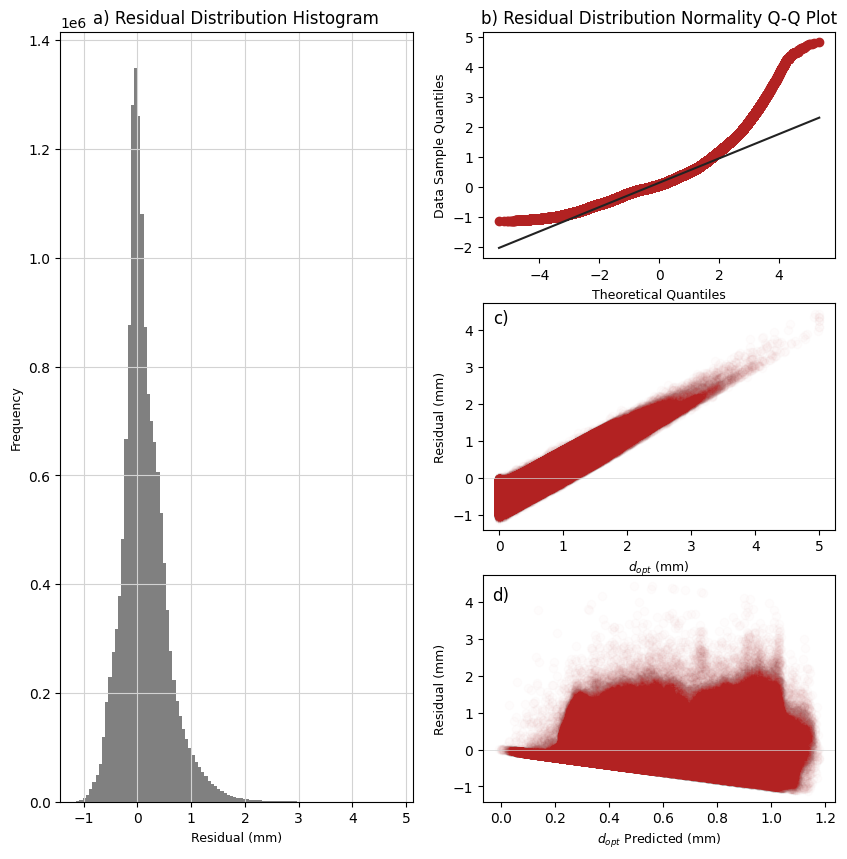

In [6]:
residual_analysis(xgboost_pred, data)

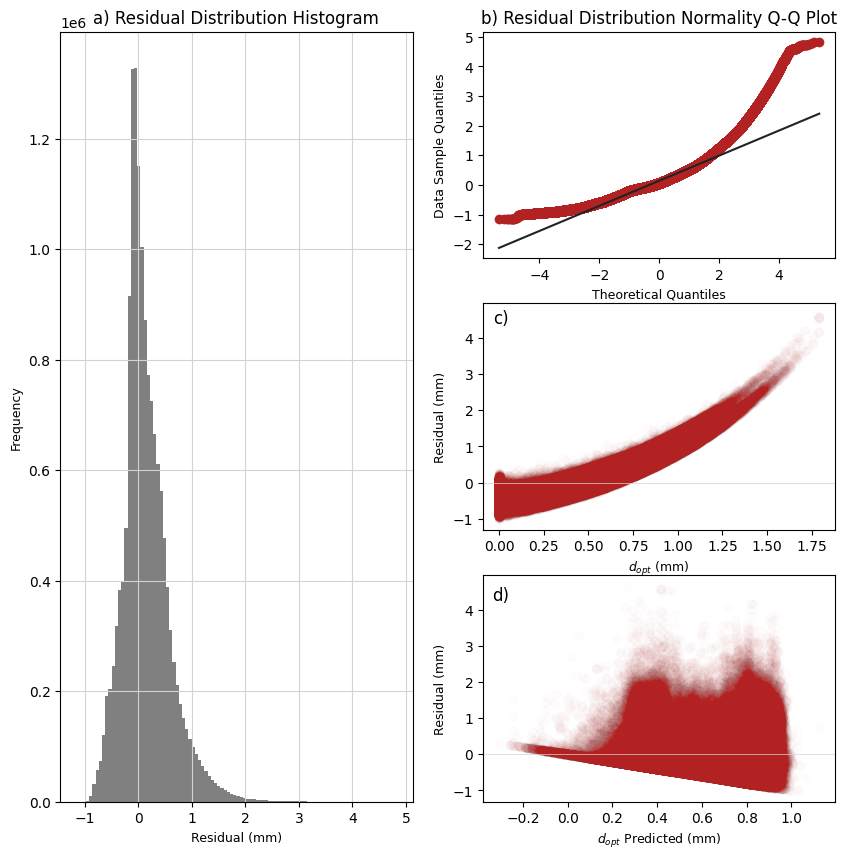

In [13]:
residual_analysis(LinReg_pred, data)

### Real vs predicted

In [7]:
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

def density_scatter(df, ax=None, sort=True, bins=20, bin_width=0.25, **kwargs):
    """
    Scatter plot colored by 2d histogram
    """
    df = df.sample(frac=0.08, random_state=1)
    x=df['opt_value_backtransformed']
    y=df['mean_prediction']

    if ax is None:
        fig, ax = plt.subplots()
    data, x_e, y_e = np.histogram2d(x, y, bins=bins, density=True)
    z = interpn((0.5 * (x_e[1:] + x_e[:-1]), 0.5 * (y_e[1:] + y_e[:-1])), data, np.vstack([x, y]).T,
                method="splinef2d", bounds_error=False)
    #z[np.where(np.isnan(z))] = 0.0 # To be sure to plot all data

    # Sort the points by density, so that the densest points are plotted last
    if sort:
        idx = np.argsort(z)
        x, y, z = np.array(x)[idx], np.array(y)[idx], np.array(z)[idx]

    sc = ax.scatter(x, y, c=z, cmap='YlOrBr_r', **kwargs)
    ax.set_xlabel('$d_{opt}$ (mm)')
    ax.set_ylabel('$d_{opt}$ Predicted (mm)')
    #ax.set_ylim(bottom = (y.min()-0.03))
    #ax.set_title('Real vs. Predicted Values')

    # Find the range of data
    data_min = min(x)
    data_max = max(y)

    # # Adding the line of exact match
    # lin = ax.plot([data_min, data_max], [data_min, data_max], color='black', linestyle='--')

    # Calculate average predicted value per bin of real value
    bin_edges = np.arange(min(x), max(x) + bin_width, bin_width)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    predicted_avg = [np.mean(y[(x >= bin_edges[i]) & (x < bin_edges[i + 1])]) for i in range(len(bin_centers))]

    # Plot line with average predicted value per bin
    line = ax.plot(bin_centers, predicted_avg, color='#222222', linestyle='--', linewidth=2, label='Average Predicted Value')

    # Colorbar and normalization
    norm = Normalize(vmin=np.min(z), vmax=np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='YlOrBr_r'), ax=ax)
    cbar.ax.set_ylabel('Density')

    # Legend
    legend = ax.legend([line[0]], ['Average Predicted Value'], loc = 'lower right')
    #legend.get_frame().set_alpha(0.0)

    return ax


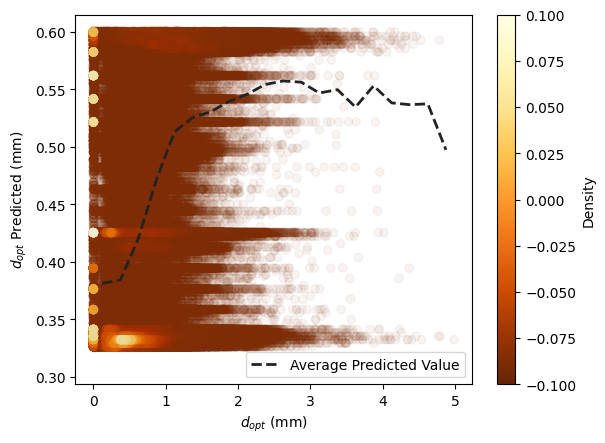

In [6]:
#for this plot need to uncomment the additional space!
density_scatter(lasso_pred, ax = None, sort = True, bins = 2000, alpha = 0.05); # done 20d

In [ ]:
#density_scatter(LinReg_pred, ax = None, sort = True, bins = 2000, alpha = 0.05); 

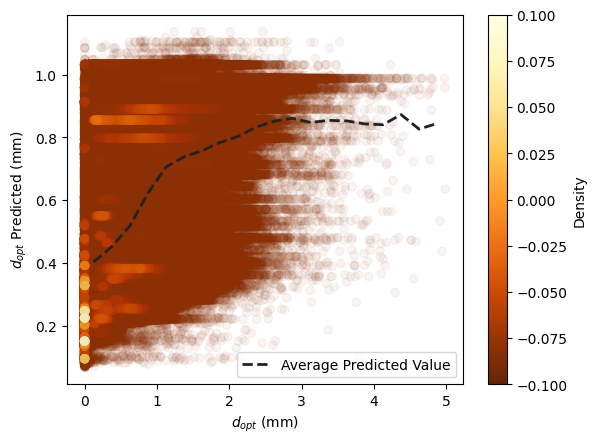

In [10]:
density_scatter(forest_pred, ax = None, sort = True, bins = 2000, alpha = 0.05); # done 20 d

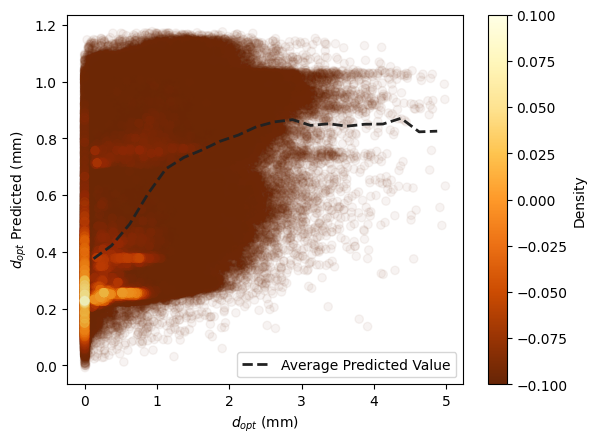

In [8]:
density_scatter(xgboost_pred, ax = None, sort = True, bins = 2000, alpha = 0.05); # done 20d

### Other plots

#### heat

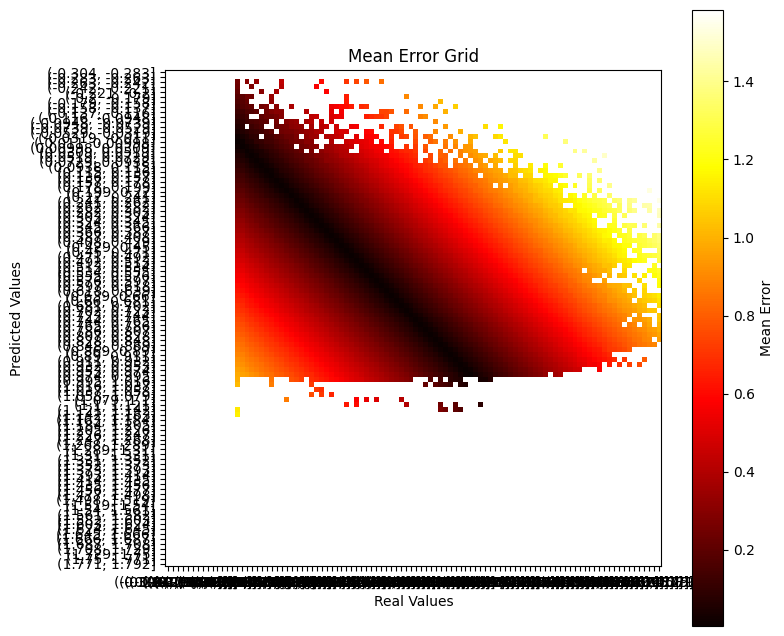

In [86]:
df = pred

# Define the number of bins
num_bins = 100

# Calculate the bin edges for real and predicted values
min_value = min(df['opt_value'].min(), df['mean_prediction'].min())
max_value = max(df['opt_value'].max(), df['mean_prediction'].max())
bin_edges = np.linspace(min_value, max_value, num=num_bins+1)

# Bin the real and predicted values using the same bin edges
real_bins = pd.cut(df['opt_value'], bins=bin_edges)
pred_bins = pd.cut(df['mean_prediction'], bins=bin_edges)

# Group the data by the bin ranges and calculate the mean error for each group
mean_error = df.groupby([real_bins, pred_bins])['error_prediction'].mean().unstack().T

# Create the heatmap grid
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mean_error.values, cmap='hot')

# Set x and y axis labels
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')

# Set x and y axis tick labels
ax.set_xticks(np.arange(num_bins))
ax.set_yticks(np.arange(num_bins))
ax.set_xticklabels(mean_error.columns)
ax.set_yticklabels(mean_error.index)

# Set colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Mean Error')

# Show the plot
plt.title('Mean Error Grid')
plt.show()


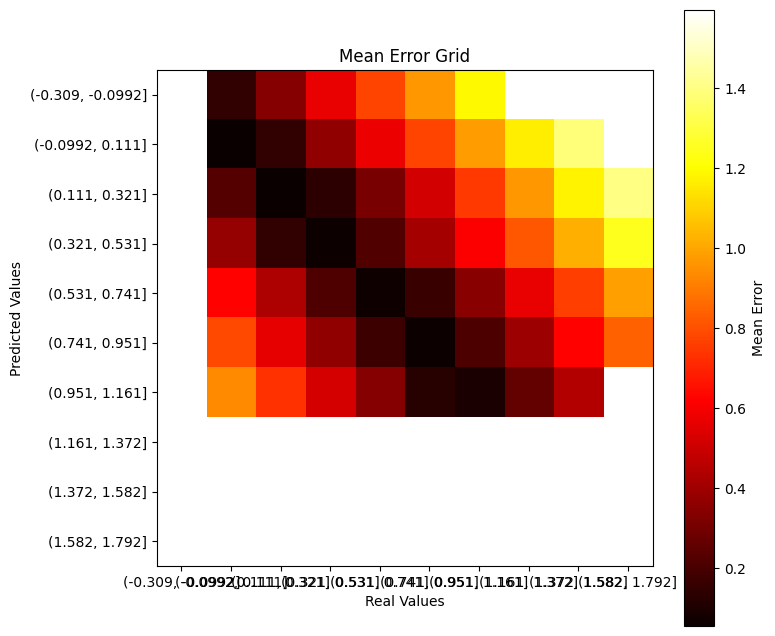

In [11]:
df = data_predicted()

# Define the number of bins
num_bins = 10

# Calculate the bin edges for real and predicted values
min_value = min(df['opt_value'].min(), df['mean_prediction'].min())
max_value = max(df['opt_value'].max(), df['mean_prediction'].max())
bin_edges = np.linspace(min_value, max_value, num=num_bins+1)

# Bin the real and predicted values using the same bin edges
real_bins = pd.cut(df['opt_value'], bins=bin_edges)
pred_bins = pd.cut(df['mean_prediction'], bins=bin_edges)

# Group the data by the bin ranges and calculate the mean error for each group
mean_error = df.groupby([real_bins, pred_bins])['error_prediction'].mean().unstack().T

# Create the heatmap grid
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mean_error.values, cmap='hot')

# Set x and y axis labels
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')

# Set x and y axis tick labels
ax.set_xticks(np.arange(num_bins))
ax.set_yticks(np.arange(num_bins))
ax.set_xticklabels(mean_error.columns)
ax.set_yticklabels(mean_error.index)

# Set colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Mean Error')

# Show the plot
plt.title('Mean Error Grid')
plt.show()
